## Algorithmique - Comparaison d'algorithmes de Tri

Un algorithme de tri permet d'organiser une collection d'objets selon une relation d'ordre déterminée. Les objets à trier sont des éléments d'un ensemble muni d'un ordre total, c'est-à-dire qu'il est possible de comparer n'importe lesquels de deux éléments de l'ensemble avec l'opérateur "supérieur à" ou "inférieur à".

D'ensemble muni d'une relation d'ordre : les entiers, les les réels, les dates, les heures, les chaînes de caractère (ordre "alphabétique"). Il existe bien d'autres relations d'ordre qui peuvent être très spécifiques (par exemple, dans un jeu de 32 cartes, le classement de la carte la plus faible à la plus forte dépend de la règle du jeu, et différera suivant que l'on joue à la belote ou à la bataille).

Un algorithme de tri a pour objectif de classer un ensemble d'éléments suivant cette relation d'ordre, par exemple : du plus petit au plus grand pour un ensemble d'entiers, du plus ancien au plus récent pour un ensemble de dates, classement dans l'ordre alphabétique pour un ensemble de chaînes de caractères.

Les algorithmes de tris sont massivement utilisés en informatique. L'amélioration de leurs performances fait l'objet de travaux de développements incessants.

Dans ce TP/TD, on cherche à classer dans l'ordre croissant une liste aléatoire d'entiers, en utilisant 3 algorithmes de tri différents : tri à bulle, tri par insertion, tri rapide. L'objectif est de comparer les performances de ces trois algorithmes.    

### Préparation des données
Dans cette cellule préliminaire, on créée une liste aléatoire de $N$ nombres entiers choisis entre $0$ et $N-1$.

### Question préliminaire
Expliquer, en insérant les commentaires pertinents, ce que fait le code de la cellule suivante.

In [1]:
N = 20
import random

def creer_liste_aleatoire(n):
    lst = list(range(n))
    random.shuffle(lst)
    return lst

list_to_sort = creer_liste_aleatoire(N)
print(f"Liste de {N} entiers à trier: {list_to_sort}")

Liste de 20 entiers à trier: [16, 10, 13, 14, 6, 0, 19, 2, 17, 18, 11, 1, 5, 8, 7, 4, 9, 15, 3, 12]


## Tri par insertion
On donne ci-dessous, en pseudo-code, l'algorithme du tri par insertion.
```bash
POUR (i allant de 0 à n-1) FAIRE
	valeur ← liste[i]
	j ← i
	TANTQUE ( j > 0 et liste[j-1] > valeur) FAIRE
		liste[j] ← liste[j-1]
		j ← j-1
	FIN TANTQUE
	liste[j] ← valeur
FIN POUR
```

### Question 1. 
Implémenter avec Python l'algorithme précédent dans une fonction `tri_insertion` qui retourne la liste triée. 

In [2]:
def tri_insertion(liste):
    nb_operations = 0
    for i in range(len(liste)):
        valeur = liste[i]
        j = i
        nb_operations += 2
        while j > 0 and liste[j-1] > valeur:
            liste[j] = liste[j-1]
            j = j - 1
            nb_operations += 2
        liste[j] = valeur
        nb_operations += 1
    return liste, nb_operations

# vérification
tri_insertion(list_to_sort)[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### Question 2.
Programmer une fonction `test_tri_insertion` qui vérifie que le tri a bien été effectué, c'est-à-dire que chaque élément de la liste est inférieur ou égal à son successeur.

In [3]:
def test_tri_insertion():
    sorted_list = tri_insertion(list_to_sort)[0]
    for i in range(len(sorted_list) - 1):  # attention, on ne va pas jusqu'au bout
        assert sorted_list[i] <= sorted_list[i + 1]
test_tri_insertion()

### Question 3.
Modifier la fonction `tri_insertion` pour qu'elle retourne, en plus de la liste triée, le nombre d'opérations qui ont été nécessaires (additions, soustractions, multplications, divisions, affectations).

### Question 4.
Tracer sur un graphique l'évolution du nombre d'opérations nécessaires pour faire le tri par insertion d'une liste de N entiers pour N allant de 100 à 1000 par pas de 10.

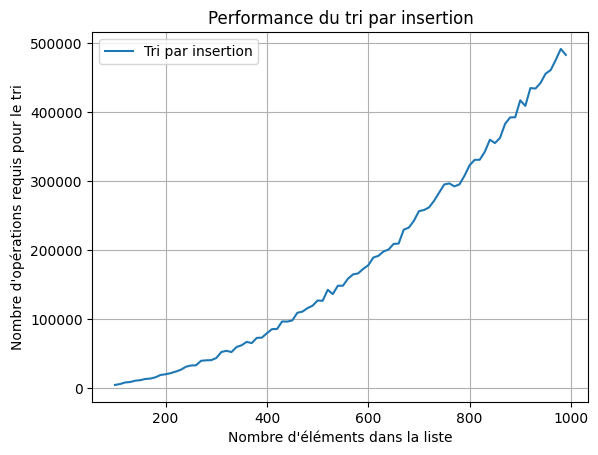

In [4]:
import matplotlib.pyplot as plt

liste_N = range(100, 1000, 10)
nb_ope_insertion = []

for N in liste_N:
    liste_a_trier = list(range(N))
    random.shuffle(liste_a_trier)
    nb_ope_insertion.append(tri_insertion(liste_a_trier)[1])

plt.plot(liste_N, nb_ope_insertion, label="Tri par insertion")
plt.title("Performance du tri par insertion")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.legend()
plt.grid()
plt.show()

## Tri à bulles
On donne ci-dessous, en pseudo-code, l'algorithme du tri à bulles.
```bash
echange_en_cours ← VRAI
TANTQUE (echange_en_cours = VRAI) FAIRE
	echange_en_cours ← FAUX
	POUR j de 0 à n-2 FAIRE
		SI liste[j] > liste[j + 1] ALORS
			échanger liste[j] et liste[j + 1]
			echange_en_cours ← VRAI
		FIN SI
	FIN POUR
FIN TANTQUE
```

### Question 5.
Effectuer le même travail que pour le tri par insertion, jusqu'au tracé du graphique.

In [5]:
# tout d'abord, je programme la fonction qui permet d'effectuer le tri conformément à l'algorithme ci-dessus.
def tri_a_bulles(liste):
    nb_operations = 0
    echange_en_cours = True
    while echange_en_cours:
        echange_en_cours = False
        for j in range(len(liste) - 1):
            nb_operations += 1
            if liste[j] > liste[j + 1]:
                # avec python, le swap de deux variables a et b
                # se fait avec l'instruction
                # a, b = b, a
                liste[j], liste[j + 1] = liste[j + 1], liste[j]
                echange_en_cours = True
                nb_operations += 3
    return liste, nb_operations

# vérification
tri_a_bulles([6, 5, 7, 3, 1, 2])[0]

[1, 2, 3, 5, 6, 7]

In [6]:
# fonction de test
def test_tri_a_bulles():
    sorted_list = tri_a_bulles(list_to_sort)[0]
    for i in range(len(sorted_list) - 1):  # attention, on ne va pas jusqu'au bout
        assert sorted_list[i] <= sorted_list[i + 1]
test_tri_a_bulles()

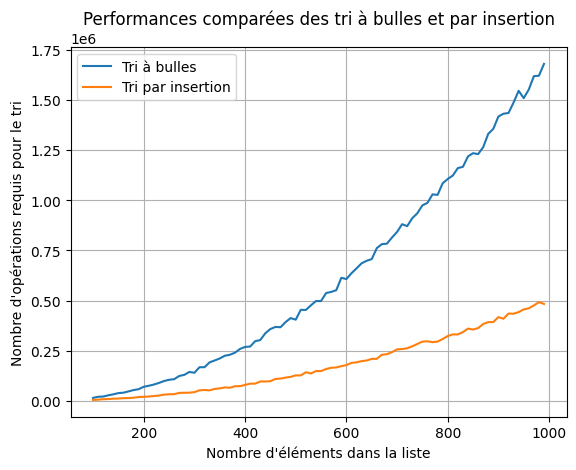

In [7]:
# le graphique pour les mêmes valeurs de N, en traçant aussi le tri par insertion

liste_N = range(100, 1000, 10)
nb_ope_bulles = []

for N in liste_N:
    liste_a_trier = list(range(N))
    random.shuffle(liste_a_trier)
    nb_ope_bulles.append(tri_a_bulles(liste_a_trier)[1])

plt.plot(liste_N, nb_ope_bulles, label="Tri à bulles")
plt.plot(liste_N, nb_ope_insertion, label="Tri par insertion")
plt.title("Performances comparées des tri à bulles et par insertion")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.legend()
plt.grid()
plt.show()

## Tri rapide
Enfin, on donne l'algorithme en pseudo-code d'un troisième algorithme de tri, connu sous le nom de tri rapide ou quick sort.
```bash

SI nombre_d_element_de_liste = 0 FAIRE:
    RENVOYER LISTE

pivot ← liste[0]

POUR i de 0 à n-1 FAIRE
    liste_plus_petit ← []
    liste_plus_grand ← []
    POUR i de 1 à n:
        SI liste[i] <= pivot FAIRE
            AJOUTER liste[i] à liste_plus_petit
        SINON FAIRE
            AJOUTER liste[i] à liste_plus_grand
        FIN_SI
    APPLIQUER RECURSIVEMENT TRI_RAPIDE sur liste_plus_petit
    APPLIQUER RECURSIVEMENT TRI_RAPIDE sur liste_plus_grand
    CONCATENER les deux listes
    RENVOYER CETTE LISTE
FIN POUR
```

### Question 6.
Reprendre le travail précédent pour ce nouvel algorithme de tri.

In [8]:
def tri_rapide(input_list):
    if len(input_list) == 0:
        return input_list, 0

    nb_operations = 0

    pivot = input_list[0]
    
    liste_plus_petit = []
    liste_egal = [pivot]
    liste_plus_grand = []

    for i in range(1, len(input_list)):
        elem = input_list[i]
        nb_operations += 1
        if elem < pivot:
            liste_plus_petit.append(elem)
            nb_operations += 2 # une comparaison et une affectation
        elif elem > pivot:
            liste_plus_grand.append(elem)
            nb_operations += 3 # deux comparaisons et une affectation
        else:
            liste_egal.append(elem)
            nb_operations += 3 # deux comparaisons et une affectation
    
    liste_plus_petit_triee, nb_1 = tri_rapide(liste_plus_petit)
    liste_plus_grand_triee, nb_2 = tri_rapide(liste_plus_grand)
    
    liste_finale = liste_plus_petit_triee + liste_egal + liste_plus_grand_triee
    
    nb_op = nb_1 + nb_2 + nb_operations
    return liste_finale, nb_operations

# vérification
tri_rapide([11, 12, 8, 7, 10, 8, 9])

([7, 8, 8, 9, 10, 11, 12], 19)

In [9]:
# fonction de test
def test_tri_rapide():
    sorted_list = tri_rapide(list_to_sort)[0]
    for i in range(len(sorted_list) - 1):  # attention, on ne va pas jusqu'au bout
        assert sorted_list[i] <= sorted_list[i + 1]
test_tri_rapide()

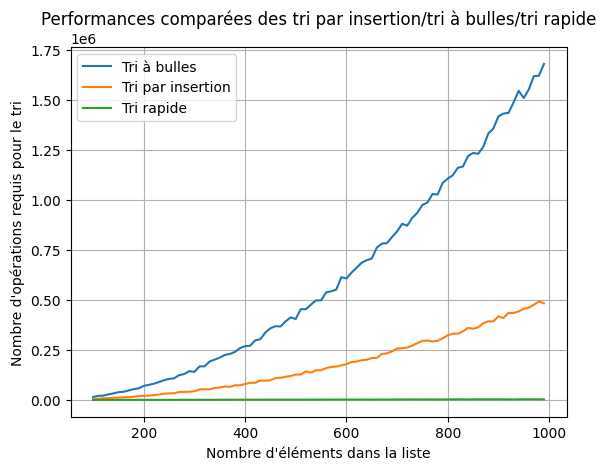

In [10]:
# finalement, on trace le graphique avec la comparaison des 3 algorithmes
# le graphique pour les mêmes valeurs de N, en traçant aussi le tri par insertion
liste_N = range(100, 1000, 10)
nb_ope_rapide = []

for N in liste_N:
    liste_a_trier = list(range(N))
    random.shuffle(liste_a_trier)
    nb_ope_rapide.append(tri_rapide(liste_a_trier)[1])

plt.plot(liste_N, nb_ope_bulles, label="Tri à bulles")
plt.plot(liste_N, nb_ope_insertion, label="Tri par insertion")
plt.plot(liste_N, nb_ope_rapide, label="Tri rapide")
plt.title("Performances comparées des tri par insertion/tri à bulles/tri rapide")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.legend()
plt.grid()
plt.show()

## Complexité algorithmique

### Question 8.
Déterminer la complexité algorithmique des 3 algorithmes précédents. Vous porterez, sur le graphique, un majorant pour justifier votre réponse.



La complexité algorithmique des tri par insertion et tri à bulle est une complexité quadratique $O(n^2)$. Justification sur le graphique ci-dessous.

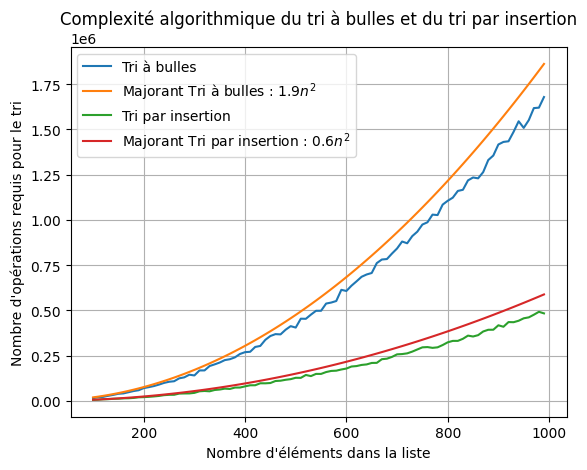

In [11]:
# le graphique pour les mêmes valeurs de N, en traçant aussi le tri par insertion
import numpy as np

liste_N = np.array(range(100, 1000, 10))

plt.plot(liste_N, nb_ope_bulles, label="Tri à bulles")
plt.plot(liste_N, 1.9 * liste_N ** 2, label="Majorant Tri à bulles : $1.9n^2$")
plt.plot(liste_N, nb_ope_insertion, label="Tri par insertion")
plt.plot(liste_N, 0.6 * liste_N ** 2, label="Majorant Tri par insertion : $0.6n^2$")

plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.title("Complexité algorithmique du tri à bulles et du tri par insertion")
plt.legend()
plt.grid()
plt.show()

La complexité pour l'algorithme du tri rapide est $O(nlog(n))$. Je le représente sur un autre graphique.

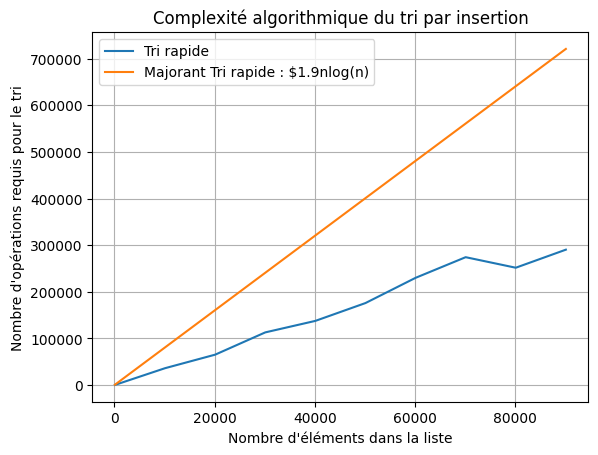

In [12]:
# finalement, on trace le graphique avec la comparaison des 3 algorithmes
# le graphique pour les mêmes valeurs de N, en traçant aussi le tri par insertion
liste_N = np.array(range(100, 100000, 10000))

nb_ope_rapide = []

for N in liste_N:
    liste_a_trier = list(range(N))
    random.shuffle(liste_a_trier)
    nb_ope_rapide.append(tri_rapide(liste_a_trier)[1])
    
plt.plot(liste_N, nb_ope_rapide, label="Tri rapide")
plt.plot(liste_N, 8 * liste_N, label="Majorant Tri rapide : $1.9nlog(n)")
plt.title("Complexité algorithmique du tri par insertion")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.legend()
plt.grid()
plt.show()

## Prévision du temps de calcul
On doit trier une d'un milliard d'entiers (c'est-à-dire $10^9$ entiers). Avant de se lancer dans cette tâche, nous allons prévoir le temps requis pour le faire, avec chacun des algorithmes.

### Question 9.
Pour chacun des algorithmes, mesurer le temps moyen nécessaire pour trier une liste de 100000 ($10^4$) entiers.

In [13]:
liste_a_trier = creer_liste_aleatoire(10 ** 4)

import time
t0 = time.perf_counter()
tri_a_bulles(liste_a_trier.copy())
t1 = time.perf_counter()
temps_bulles = t1 - t0
print(f"Temps nécessaire pour trier 10**4 entiers avec tri à bulles : {temps_bulles:.2f}s")
tri_insertion(liste_a_trier.copy())
t2 = time.perf_counter()
temps_insertion = t2 - t1
print(f"Temps nécessaire pour trier 10**4 entiers avec tri par insertion : {temps_insertion:.2f}s")
tri_rapide(liste_a_trier.copy())
t3 = time.perf_counter()
temps_rapide = t3 - t2
print(f"Temps nécessaire pour trier 10**4 entiers avec tri rapide : {temps_rapide:.2f}s")

Temps nécessaire pour trier 10**4 entiers avec tri à bulles : 10.12s
Temps nécessaire pour trier 10**4 entiers avec tri par insertion : 3.02s
Temps nécessaire pour trier 10**4 entiers avec tri rapide : 0.02s


### Question 10.
Compte tenu de la complexité de chaque algorithme, déterminer, par extrapolation à partir des résultats précédents, le temps nécessaire pour effectuer le tri d'une liste de $10^{9}$ entiers. On demande un ordre de grandeur.

Réponse:
* pour le tri à bulles : $t = 23.88 \times (\frac{10^{9}}{10^5})^2$
* pour le tri par insertion : $t = 7.65 \times (\frac{9^{9}}{10^5})^2$
* pour le tri rapide : $0.04 \times \frac{10^{9}}{10^5} log(\frac{10^{9}}{10^5})$

In [14]:
prevision_tps_bulles = temps_bulles * (10**9 / 10**5)**2
print(f"Prévision temps tri à bulles : {prevision_tps_bulles}s")
prevision_tps_insertion = temps_insertion * (10**9 / 10**5)**2
print(f"Prévision temps tri à bulles : {prevision_tps_insertion}s")
prevision_tps_rapide = temps_rapide * (10**9 / 10**5) * np.log(10**9/10**5)
print(f"Prévision temps tri à bulles : {prevision_tps_rapide}s")

Prévision temps tri à bulles : 1011594581.6998646s
Prévision temps tri à bulles : 301724285.7000383s
Prévision temps tri à bulles : 1944.4513232867498s


### Conclusion.
Quel est l'algorihtme le plus efficace parmi ceux que nous avons expérimentés ?

## Pour aller plus loin...

* implémenter chacun des trois algorithmes dans un autre langage de programmation de votre choix. Comparer alors les temps de traitement avec ceux que vous ave fait en Python.
* utiliser la fonction python pré-programmée `sort` et comparer, en temps de traitement, avec l'algorithme que vous avez implémenté avec Python
* tester d'autres algorithmes de tri : tri fusion, tri par tas